###Librerías y Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import io

from google.colab.patches import cv2_imshow
import urllib.request
import time

from google.colab import files
from scipy import stats
import tensorflow as tf

Importación de datos, extraído de EBird: https://ebird.org/explore

In [2]:
uploaded = files.upload()

Saving raw_data.csv to raw_data.csv


In [3]:
df2 = pd.read_csv(io.BytesIO(uploaded['raw_data.csv']))

###Análisis de la Data

In [ ]:
df2.info()

In [ ]:
df2.count()

In [ ]:
#Número total de especies en la data
len(df2['Scientific Name'].unique())

In [ ]:
#Nota para Arian: Esta celda no se puede eliminar? ya que la siguiente hace la agrupación por especie

#Número de fotografías por especie
df2.groupby(['Scientific Name']).count()

Conclusión del análisis:
 * Existen 10000 registros
 * Existen 1483 especies registradas

###Distribución de Registro de Especies

In [5]:
species_sorted_desc = df2.groupby(['Scientific Name']).count()['ML Catalog Number'].sort_values(ascending=False)
species_sorted_desc

Scientific Name
Larosterna inca                                164
Chrysuronia oenone                              96
Coragyps atratus                                62
Pelecanus thagus                                59
Rupicola peruvianus                             58
                                              ... 
Hemitriccus striaticollis                        1
Schistochlamys melanopis                         1
Hemitriccus zosterops                            1
Henicorhina leucophrys leucophrys/boliviana      1
Euchrepomis sharpei                              1
Name: ML Catalog Number, Length: 1483, dtype: int64

In [ ]:
species_sorted_desc.value_counts()

In [ ]:
x=species_sorted_desc.value_counts().index.values
y=species_sorted_desc.value_counts().values
plt.xlabel('Cantidad de registros')
plt.ylabel('Cantidad de especies')
plt.bar(x,y,color='maroon',width=1)

In [8]:
# Se eliminan las especies con pocos registros hasta que 
# el número total de registros sea aproximadamente 5000
def get_index_drop():
  sum = 0
  for index, value in species_sorted_desc.iteritems():
    sum += value
    if (sum >= 1000):
      return (index, value)

get_index_drop()
#Se muestra el último espécimen eliminado y su número de registros.

('Leucophaeus pipixcan', 39)

In [9]:
species_to_drop = species_sorted_desc[species_sorted_desc.iloc[:] < get_index_drop()[1]].index

In [ ]:
# Eliminando en el Dataframe
df_final = df2[~df2['Scientific Name'].isin(species_to_drop.to_list())]
df_final

In [11]:
len(df_final['Scientific Name'].unique())
# Número de clases 

20

###Carga de Imágenes

In [12]:
# Funciones de utilidad
def get_url_image(id):
  return f'https://cdn.download.ams.birds.cornell.edu/api/v1/asset/{id}/1200'

def get_list_of_url_by_id(df,title):
  list_url=[]
  for id in df[title]:
    list_url.append(get_url_image(id))
  return list_url

def save_image(link, new_name):
  urllib.request.urlretrieve(link, new_name)

In [13]:
# Añadimos una columna que hace referencia al link de cada imagen
url = get_list_of_url_by_id(df_final, 'ML Catalog Number')
df_final = df_final.assign(ImageURL=url)

In [14]:
df_final.head()

,ML Catalog Number,Format,Common Name,Scientific Name,Background Species,Recordist,Date,Year,Month,Day,...,eBird Species Code,Taxon Category,Taxonomic Sort,Recordist 2,Average Community Rating,Number of Ratings,Asset Tags,Original Image Height,Original Image Width,ImageURL
0,372577651,Photo,Cormorán de Pata Roja,Poikilocarbo gaimardi,NaN,Jory Teltser,2021-09-23,2021.0,9.0,23.0,...,relcor1,Species,NaN,NaN,4.96,427,NaN,2224.0,3336.0,https://cdn.download.ams.birds.cornell.edu/api...
1,417385121,Photo,Gaviotín Zarcillo,Larosterna inca,NaN,Ben Lucking,2022-01-29,2022.0,1.0,29.0,...,incter1,Species,NaN,NaN,4.99,124,NaN,2868.0,4302.0,https://cdn.download.ams.birds.cornell.edu/api...
5,416588411,Photo,Zambullidor de Junín,Podiceps taczanowskii,NaN,Ben Lucking,2022-02-10,2022.0,2.0,10.0,...,jungre1,Species,NaN,NaN,4.98,86,NaN,1741.0,2612.0,https://cdn.download.ams.birds.cornell.edu/api...
16,172494391,Photo,Brillante de Frente Violeta,Heliodoxa leadbeateri,NaN,Alex Wiebe,2019-08-03,2019.0,8.0,3.0,...,vifbri1,Species,4601.0,NaN,4.98,56,NaN,NaN,NaN,https://cdn.download.ams.birds.cornell.edu/api...
20,420074571,Photo,Gaviotín Zarcillo,Larosterna inca,NaN,Brandon Nidiffer,2022-01-29,2022.0,1.0,29.0,...,incter1,Species,NaN,NaN,4.95,58,NaN,3876.0,5814.0,https://cdn.download.ams.birds.cornell.edu/api...


In [15]:
df_images = {'Image': [], 'Scientific Name': []}
for i in range(len(df_final)):
  print(i)
  image_name_aux = f'{df_final.iloc[i]["ML Catalog Number"]}.jpg'
  save_image(df_final.iloc[i]['ImageURL'], image_name_aux)
  df_images['Image'].append(image_name_aux)
  df_images['Scientific Name'].append(df_final.iloc[i]['Scientific Name'])
df_images = pd.DataFrame(data=df_images)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [16]:
df_images.head()


,Image,Scientific Name
0,372577651.jpg,Poikilocarbo gaimardi
1,417385121.jpg,Larosterna inca
2,416588411.jpg,Podiceps taczanowskii
3,172494391.jpg,Heliodoxa leadbeateri
4,420074571.jpg,Larosterna inca



Orden de carpetas para la mejor distribución entre entrenamiento, validación y test.

In [17]:
import os
import shutil

In [18]:
clases = df_images['Scientific Name'].unique()
clases

array(['Poikilocarbo gaimardi', 'Larosterna inca',
       'Podiceps taczanowskii', 'Heliodoxa leadbeateri',
       'Opisthocomus hoazin', 'Larus belcheri',
       'Chroicocephalus cirrocephalus', 'Phoenicopterus chilensis',
       'Pelecanus thagus', 'Loddigesia mirabilis', 'Rupicola peruvianus',
       'Chrysuronia oenone', 'Burhinus superciliaris',
       'Haematopus palliatus', 'Leucophaeus pipixcan',
       'Columbina cruziana', 'Lophornis delattrei', 'Colibri coruscans',
       'Patagona gigas', 'Coragyps atratus'], dtype=object)

In [19]:
for clase in clases:
  if not (os.path.exists("./train/"+clase)):
    os.makedirs("./train/"+clase)

  if not (os.path.exists("./test/"+clase)):
    os.makedirs("./test/"+clase)

  if not (os.path.exists("./val/"+clase)):
    os.makedirs("./val/"+clase)
    


In [ ]:
for clase in clases:
  df_clase = df_images[df_images['Scientific Name'] == clase]
  n = len(df_clase)
  n_train = int((n * 0.6) + 0.5)
  n_val = int((n * 0.25) + 0.5)
  n_test = n - n_train - n_val
  #print(n, n_train, n_test, n_val)

  ims_train = []
  ims_test = []
  ims_val = []

  for (i, im) in enumerate(df_clase['Image']):
    if i < n_train:
      shutil.move(im,"./train/"+clase)
    elif i < n_train +n_val:
      shutil.move(im,"./val/"+clase)
    else:
      shutil.move(im,"./test/"+clase)

Image generator

In [ ]:
#convertir de tipo objeto a tipo string
clase2 = []
for clase in clases:
  clase2.append(str(clase))

clases = clase2

In [ ]:
#Creando los batches
from tensorflow import keras

train_gen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.2)
val_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_batches = train_gen.flow_from_directory(
    './train',
    target_size=(256,256),
    class_mode='sparse',
    batch_size=32,
    color_mode='rgb',
    classes=clases
)

val_batches = val_gen.flow_from_directory(
    './val',
    target_size=(256,256),
    class_mode='sparse',
    batch_size=32,
    color_mode='rgb',
    classes=clases
)

test_batches = test_gen.flow_from_directory(
    './test',
    target_size=(256,256),
    class_mode='sparse',
    batch_size=32,
    color_mode='rgb',
    classes=clases
)

Found 672 images belonging to 20 classes.
Found 284 images belonging to 20 classes.
Found 167 images belonging to 20 classes.


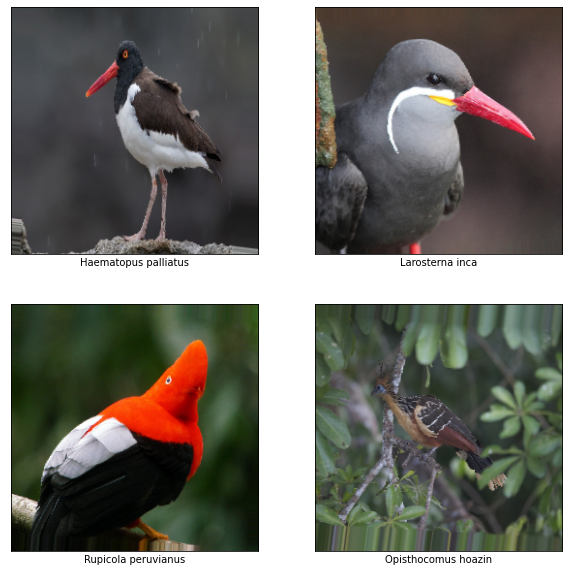

In [ ]:
def show(batch, pred_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(batch[0][i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        lbl = clases[int(batch[1][i])]
        if pred_labels is not None:
            lbl += "/ Pred:" + clases[int(pred_labels[i])]
        plt.xlabel(lbl)
    plt.show()

show(train_batches[0])

In [ ]:
from tensorflow.keras import layers

In [ ]:
model = keras.models.Sequential()
model.add(layers.Conv2D(
    32, 
    (3,3), 
    strides=(1,1), 
    padding="valid",
    activation='relu',
    input_shape = (256,256,3)
    ))
model.add(layers.MaxPool2D(2,2)),
model.add(layers.Conv2D(
    64, 
    (3,3), 
    activation='relu',
    )),
model.add(layers.MaxPool2D(2,2)),
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(20))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]
model.compile(optimizer=optim, loss=loss, metrics=metrics)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:

epochs = 10

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=2
)


#Con 672 registros de entrenamiento y 20 clases, cada epoca demora entre 90 y 103 segundos
history = model.fit(train_batches,
                    validation_data=val_batches,
                    epochs=epochs,
                    callbacks=[early_stopping])

Epoch 1/10
21/21 [==============================] - 92s 4s/step - loss: 5.1516 - accuracy: 0.1295 - val_loss: 2.8955 - val_accuracy: 0.1937
Epoch 2/10
21/21 [==============================] - 94s 4s/step - loss: 2.7082 - accuracy: 0.2188 - val_loss: 2.6474 - val_accuracy: 0.2148
Epoch 3/10
21/21 [==============================] - 92s 4s/step - loss: 2.5069 - accuracy: 0.2560 - val_loss: 2.5992 - val_accuracy: 0.2359
Epoch 4/10
21/21 [==============================] - 96s 5s/step - loss: 2.3896 - accuracy: 0.2902 - val_loss: 2.4122 - val_accuracy: 0.2817
Epoch 5/10
21/21 [==============================] - 103s 5s/step - loss: 2.1034 - accuracy: 0.3482 - val_loss: 2.2696 - val_accuracy: 0.3134
Epoch 6/10
21/21 [==============================] - 94s 4s/step - loss: 1.9152 - accuracy: 0.3854 - val_loss: 2.2184 - val_accuracy: 0.3415
Epoch 7/10
21/21 [==============================] - 93s 4s/step - loss: 1.8062 - accuracy: 0.4405 - val_loss: 2.6344 - val_accuracy: 0.2606
Epoch 8/10
21/21 [=

#TRANSFER LEARNING

In [ ]:
#Extrañendo el model vgg16 de keras
vgg_model = tf.keras.applications.vgg16.VGG16()
print(type(vgg_model))
vgg_model.summary()

553476096/553467096 [==============================] - 5s 0us/step
<class 'keras.engine.functional.Functional'>
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
               

In [ ]:
model = keras.models.Sequential()
for layer in vgg_model.layers[0:-1]:
    model.add(layer)

In [ ]:
for layer in model.layers:
    layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
model.add(layers.Dense(20))

In [ ]:
model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [ ]:
# Se utiliza el preprocesamiento de la red ya entrenada al igual que su target_size

preprocess_input = tf.keras.applications.vgg16.preprocess_input

train_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
val_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_batches = train_gen.flow_from_directory(
    './train',
    target_size=(224,224),
    class_mode='sparse',
    batch_size=32,
    color_mode='rgb',
    classes=clases
)

val_batches = val_gen.flow_from_directory(
    './val',
    target_size=(224,224),
    class_mode='sparse',
    batch_size=32,
    color_mode='rgb',
    classes=clases
)

test_batches = test_gen.flow_from_directory(
    './test',
    target_size=(224,224),
    class_mode='sparse',
    batch_size=32,
    color_mode='rgb',
    classes=clases
)

Found 672 images belonging to 20 classes.
Found 284 images belonging to 20 classes.
Found 167 images belonging to 20 classes.


In [ ]:

epochs = 10

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=2
)


#Con 672 registros de entrenamiento y 20 clases, cada epoca demora entre 90 y 103 segundos
history = model.fit(train_batches,
                    validation_data=val_batches,
                    epochs=epochs,
                    callbacks=[early_stopping])

Epoch 1/10
21/21 [==============================] - 517s 25s/step - loss: 2.1277 - accuracy: 0.6027 - val_loss: 0.6603 - val_accuracy: 0.8204
Epoch 2/10
21/21 [==============================] - 590s 29s/step - loss: 0.3486 - accuracy: 0.9137 - val_loss: 0.8175 - val_accuracy: 0.8592
Epoch 3/10
21/21 [==============================] - 506s 24s/step - loss: 0.0509 - accuracy: 0.9821 - val_loss: 0.6728 - val_accuracy: 0.8768
Epoch 4/10
21/21 [==============================] - 507s 24s/step - loss: 0.0208 - accuracy: 0.9926 - val_loss: 0.6977 - val_accuracy: 0.8768
Epoch 5/10
21/21 [==============================] - 506s 24s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.7023 - val_accuracy: 0.8697
Epoch 6/10
21/21 [==============================] - 503s 24s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6771 - val_accuracy: 0.8803
Epoch 6: early stopping
